# Instituto Tecnológico y de Estudios Superiores de Monterrey
## Maestría en Inteligencia Artificial Aplicada
### Proyecto Integrador (Gpo 10) - TC5035.10

### **Proyecto: Diseño Acelerado de Fármacos**

### Avance 3: Baseline

#### **Docentes:**
- Dra. Grettel Barceló Alonso - Profesor Titular
- Dr. Luis Eduardo Falcón Morales - Profesor Titular
- Dr. Horacio Martinez Alfaro  – Profesor Tutor

#### **Miembros del equipo:**
 - Jose Luis Artigas Arroyo - A01794906
 - José Luis Fabela Portillo - A00748551
 - Alejandro Emmanuel Silva Ortega - A01794545

# Seleccion de modelo para baseline

Para la seleccion de un baseline se usaran 3 modelos para comparar su desempeño, para lograr este objetivo usaremos la funcion de lazypredict, la cual puede realizar una comparativa entre varios modelos, y de esta forma podremos seleccionar los candidatos para un análisis mas profundo.

In [13]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import re
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pickle


Vamos a importar dos archivos CSV, el que almacenaremos como variable X tiene los péptidos resultandes de las entregas pasadas con los Pfeatures obtenidos y procesados un con PCA para obtener los componentes principales.

A la variable Y se asignara el CSV con la clasificación de los péptidos en si tienen actividad anticancerígena o no(valores 1 y 0)

In [2]:
X = pd.read_csv('../data/processed/DTCPep_pfeatures.csv')
y = pd.read_csv('../data/processed/DTCPep_y.csv')

In [3]:
print(X.shape)
print(y.shape)

(8091, 239)
(8091, 1)


In [11]:
# Tipos de datos
X.dtypes.value_counts()

int64      168
float64     71
Name: count, dtype: int64

In [14]:
# Crear una instancia del StandardScaler
scaler = StandardScaler()

# Ajustar y transformar los datos
scaled_data = scaler.fit_transform(X)

# Convertir los datos escalados a un DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=X.columns)

# Mostrar los datos escalados
df_scaled

,PCP_PC,PCP_NC,PCP_NE,PCP_PO,PCP_NP,PCP_AL,PCP_CY,PCP_AR,PCP_AC,PCP_BS,...,RRI_M,RRI_N,RRI_P,RRI_Q,RRI_R,RRI_S,RRI_T,RRI_V,RRI_W,RRI_Y
0,-0.95,0.22,0.86,0.89,-0.45,-0.32,-0.67,0.51,0.22,-0.95,...,-0.61,0.83,-0.98,-0.80,1.25,0.56,0.79,0.51,1.04,1.09
1,-0.72,0.40,0.53,0.23,-0.44,-0.33,0.68,-0.08,0.40,-0.72,...,-0.61,1.11,0.74,1.03,0.20,0.56,0.79,0.51,-0.82,1.09
2,-0.84,1.83,-0.09,0.21,-0.54,-0.18,-0.67,0.09,1.83,-0.84,...,-0.61,0.83,-0.98,1.03,-0.85,0.56,-1.04,0.51,1.04,1.09
3,0.23,0.29,-0.39,0.69,-1.07,-0.80,-0.67,-0.62,0.29,0.23,...,-0.61,0.83,-0.98,-0.80,0.20,0.56,0.79,0.51,-0.82,-0.80
4,-0.52,3.88,-1.50,-0.28,-0.96,-0.92,-0.12,-0.40,3.88,-0.52,...,1.54,0.83,0.74,1.03,0.20,0.56,0.79,0.51,-0.82,1.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8086,-1.37,-0.27,1.56,1.99,-0.19,0.40,1.16,-0.32,-0.27,-1.37,...,-0.61,-1.00,0.74,-0.80,0.20,0.56,0.79,0.51,-0.82,1.09
8087,-0.22,0.59,-0.09,1.50,-1.82,-1.54,0.90,-0.64,0.59,-0.22,...,-0.61,0.83,0.74,-0.80,0.20,0.56,0.79,-1.35,-0.82,-0.80
8088,0.31,0.37,-0.51,1.50,-1.81,-1.34,-0.34,0.51,0.37,0.31,...,-0.61,0.83,0.74,1.03,0.20,0.56,0.79,0.51,-0.82,1.09
8089,-0.57,-0.82,1.02,-0.61,1.62,1.48,5.81,0.54,-0.82,-0.57,...,-0.61,-1.00,1.05,1.03,0.20,0.56,-1.04,0.51,-0.82,1.09


# Separar datasets en train y test
Como primer paso separamos el dataset en entrenamiento (80%), prueba (16%) y validación (4%)

In [15]:
X = df_scaled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state =4, stratify=y_train)


# Comparar modelos usando lazypredict
A continuación compararemos diferentes algoritmos de clasificación utilizando la librería lazypredict para observar su desempmeño general.

In [16]:
# Defines and builds the lazyclassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=root_mean_squared_error)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)

 97%|█████████▋| 31/32 [02:39<00:03,  3.62s/it]

[LightGBM] [Info] Number of positive: 2101, number of negative: 4371
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023954 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16692
[LightGBM] [Info] Number of data points in the train set: 6472, number of used features: 218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.324629 -> initscore=-0.732578
[LightGBM] [Info] Start training from score -0.732578


100%|██████████| 32/32 [02:41<00:00,  5.06s/it]


In [17]:
models_train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,root_mean_squared_error,Time Taken
Model,,,,,,
DecisionTreeClassifier,1.00,1.00,1.00,1.00,0.01,1.93
RandomForestClassifier,1.00,1.00,1.00,1.00,0.01,8.73
ExtraTreeClassifier,1.00,1.00,1.00,1.00,0.01,0.31
ExtraTreesClassifier,1.00,1.00,1.00,1.00,0.01,7.44
LabelPropagation,1.00,1.00,1.00,1.00,0.01,8.47
LabelSpreading,1.00,1.00,1.00,1.00,0.01,9.76
XGBClassifier,1.00,0.99,0.99,1.00,0.06,2.01
BaggingClassifier,0.99,0.99,0.99,0.99,0.10,13.01
LGBMClassifier,0.96,0.94,0.94,0.95,0.21,2.16


In [18]:
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


  0%|          | 0/32 [00:00<?, ?it/s]

 97%|█████████▋| 31/32 [02:32<00:03,  3.50s/it]

[LightGBM] [Info] Number of positive: 2101, number of negative: 4371
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015152 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16692
[LightGBM] [Info] Number of data points in the train set: 6472, number of used features: 218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.324629 -> initscore=-0.732578
[LightGBM] [Info] Start training from score -0.732578


100%|██████████| 32/32 [02:34<00:00,  4.84s/it]


In [19]:
models_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,root_mean_squared_error,Time Taken
Model,,,,,,
DecisionTreeClassifier,1.00,1.00,1.00,1.00,0.01,1.71
RandomForestClassifier,1.00,1.00,1.00,1.00,0.01,7.45
ExtraTreeClassifier,1.00,1.00,1.00,1.00,0.01,0.31
ExtraTreesClassifier,1.00,1.00,1.00,1.00,0.01,4.75
LabelPropagation,1.00,1.00,1.00,1.00,0.01,7.51
LabelSpreading,1.00,1.00,1.00,1.00,0.01,8.56
XGBClassifier,1.00,0.99,0.99,1.00,0.06,1.76
BaggingClassifier,0.99,0.98,0.98,0.99,0.10,12.57
LGBMClassifier,0.95,0.94,0.94,0.95,0.21,2.01


[(0.0, 1.0)]

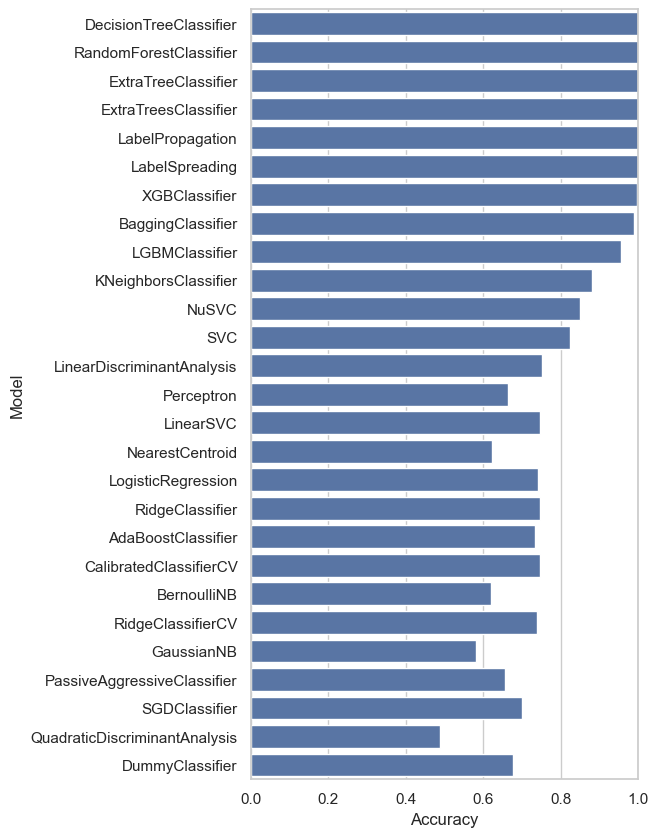

In [20]:
# Plot of Accuracy

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models_train.index, x="Accuracy", data=models_train)
ax.set(xlim=(0, 1))

[(0.0, 1.0)]

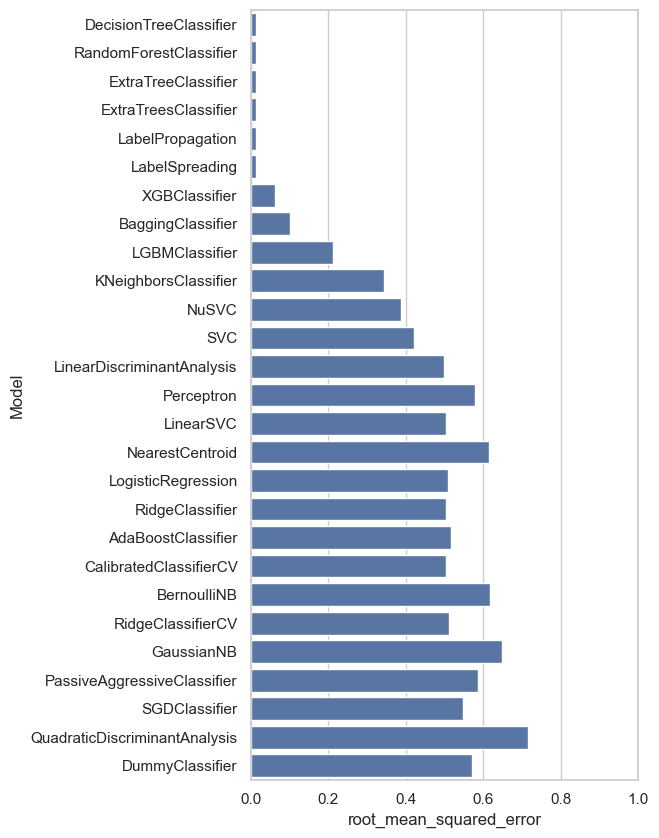

In [21]:
# Plot of rmse
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models_train.index, x="root_mean_squared_error", data=models_train)

ax.set(xlim=(0, 1))

Una vez ejecutado el lazypredict, se pudo observar que algunos de los modelos no proveen un buen desempeño con el dataset usado, ya que muestran un sobreentrenamiento, por tal motivo se seleccionaron 3 modelos que tuvieran un desempeño por abajo del 90% de accuracy.

  Los modelos de clasificación seleccionados fueron SVC, kNN y regresión logística. Una vez analizados y comparados, se eleigirá el modelo con un mejor desempeño, y con base en los resultados obtenidos en este, se definirá la metrica que mejor se ajuste al problema en particular y el desempeño mínimo a obtener.

# Modelo SVC

Un clasificador de vectores de soporte es un tipo de modelo de aprendizaje automático que se puede utilizar para tareas de clasificación. Dado un conjunto de ejemplos de entrenamiento, cada uno etiquetado como perteneciente a una de dos clases, el objetivo del clasificador de vectores de soporte es encontrar un límite de decisión que separe al máximo las dos clases.
Matemáticamente, podemos representar el límite de decisión como una función lineal de la forma



 donde w es un vector de pesos, x es un vector de características y b es un término de sesgo. El límite de decisión es el conjunto de puntos que satisfacen esta ecuación. Para encontrar el límite de decisión que separa al máximo las dos clases, podemos resolver el siguiente problema de optimización:

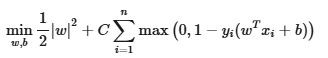

donde C es un parámetro de regularización que controla el equilibrio entre maximizar el margen y minimizar el error, i es la etiqueta del i-ésimo ejemplo de entrenamiento (ya sea 1 o -1) y x i es el vector de características correspondiente. Este problema de optimización se puede resolver mediante programación cuadrática.

La máquina de vectores de soporte es una representación de los datos de entrenamiento como puntos en el espacio separados en categorías por un espacio claro que es lo más amplio posible. Luego, los nuevos ejemplos se asignan a ese mismo espacio y se predice que pertenecen a una categoría según el lado del espacio en el que se encuentran.[1]

In [22]:


param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','sigmoid']
              }  

svc_grid = grid = GridSearchCV(SVC(random_state = 4), param_grid, refit = True, scoring = 'accuracy', verbose = 3, n_jobs = -1) 

 


In [23]:
svc_grid.fit(X_train, y_train)




Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(estimator=SVC(random_state=4), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid']},
             scoring='accuracy', verbose=3)

In [24]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, gamma=0.01, random_state=4)


In [25]:
y_train_pred_svc = grid.predict(X_train)

In [26]:
print(' Train Report \n')
print(classification_report(y_train, y_train_pred_svc, target_names=['positive','negative']))

 Train Report 

              precision    recall  f1-score   support

    positive       0.97      0.99      0.98      4371
    negative       0.97      0.93      0.95      2101

    accuracy                           0.97      6472
   macro avg       0.97      0.96      0.97      6472
weighted avg       0.97      0.97      0.97      6472



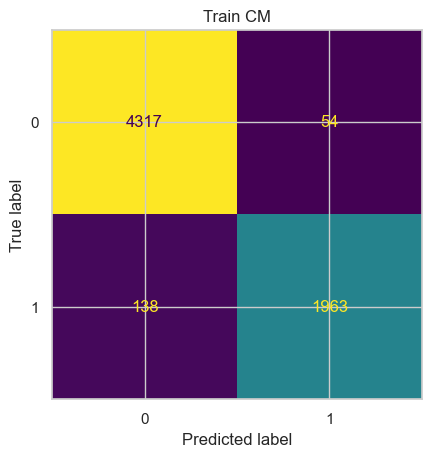

In [27]:
cm_svc = confusion_matrix(y_train, y_train_pred_svc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc)

disp.plot(colorbar= False)
disp.ax_.set_title('Train CM')
plt.show()

In [28]:
y_val_pred_svc = grid.predict(X_val)

In [29]:
print(' Val Report \n')
print(classification_report(y_val, y_val_pred_svc, target_names=['positive','negative']))

 Val Report 

              precision    recall  f1-score   support

    positive       0.97      0.99      0.98       875
    negative       0.97      0.93      0.95       420

    accuracy                           0.97      1295
   macro avg       0.97      0.96      0.96      1295
weighted avg       0.97      0.97      0.97      1295



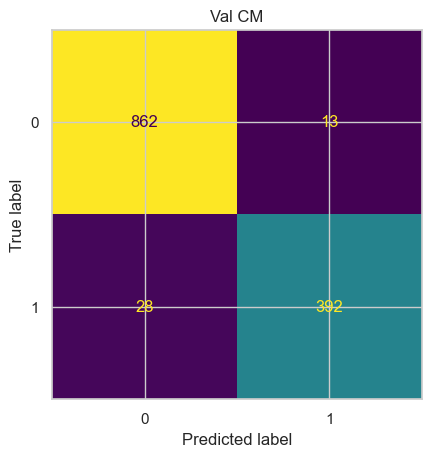

In [30]:
cm_svc = confusion_matrix(y_val, y_val_pred_svc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc)

disp.plot(colorbar = False)
disp.ax_.set_title('Val CM')
plt.show()

In [31]:
y_test_pred_svc = grid.predict(X_test)

In [32]:
print(' Test Report \n')
print(classification_report(y_test, y_test_pred_svc, target_names=['positive','negative']))

 Test Report 

              precision    recall  f1-score   support

    positive       0.97      0.99      0.98      3496
    negative       0.97      0.93      0.95      1681

    accuracy                           0.97      5177
   macro avg       0.97      0.96      0.97      5177
weighted avg       0.97      0.97      0.97      5177



 Test CM 



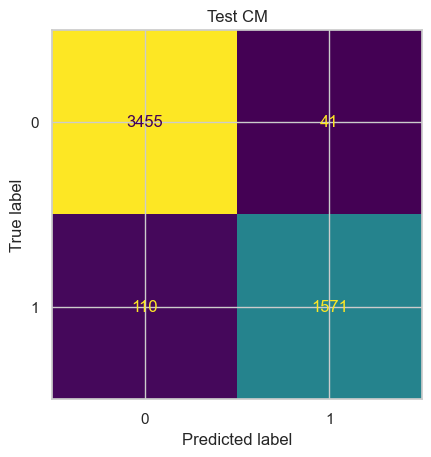

In [33]:
print(' Test CM \n')
cm_svc = confusion_matrix(y_test, y_test_pred_svc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc)
disp.plot(colorbar=False)
disp.ax_.set_title('Test CM')
plt.show()

In [34]:
with open("../models/svc_model.pkl", "wb") as f:
    pickle.dump(svc_grid.best_estimator_, f)
print("SVC Model saved")

SVC Model saved


# Modelo kNN
El clasificador de k-Nearest Neighbors es un algoritmo de aprendizaje no paramétrico basado en instancias. La clasificación se calcula a partir de una votación mayoritaria simple de los k vecinos más cercanos de cada punto.

El algoritmo funciona calculando las distancias entre el nuevo punto de datos y los datos de entrenamiento, seleccionando los k puntos de datos más cercanos y luego haciendo una predicción basada en la clase o etiqueta de vecinos seleccionados.

Este algoritmo es simple de implementar, robusto ante el ruido de los datos de entrenamiento y efectivo si los datos de entrenamiento son numerosos.[2]

In [35]:
from sklearn.neighbors import KNeighborsClassifier

# Crear el modelo
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')

# Ajustar el modelo a los datos de entrenamiento
knn.fit(X_train, y_train)

# Predecir las etiquetas en los datos
y_pred_train_knn = knn.predict(X_train)
y_pred_test_knn = knn.predict(X_test)
y_pred_val_knn = knn.predict(X_val)


In [36]:
print(' Train Report \n')
print(classification_report(y_train, y_pred_train_knn, target_names=['positive','negative']))

 Train Report 

              precision    recall  f1-score   support

    positive       0.89      0.94      0.91      4371
    negative       0.85      0.76      0.81      2101

    accuracy                           0.88      6472
   macro avg       0.87      0.85      0.86      6472
weighted avg       0.88      0.88      0.88      6472



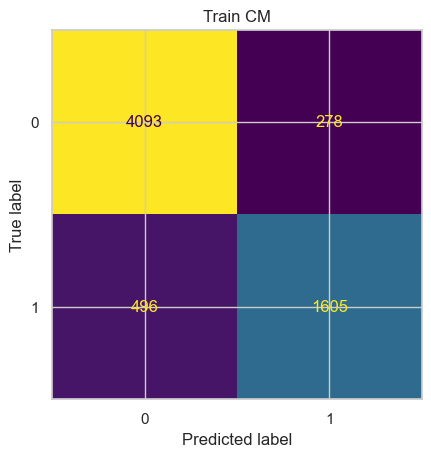

In [37]:
cm_knn = confusion_matrix(y_train, y_pred_train_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp.plot(colorbar=False)
disp.ax_.set_title('Train CM')
plt.show()

In [38]:
print(' Test Report \n')
print(classification_report(y_test, y_pred_test_knn, target_names=['positive','negative']))

 Test Report 

              precision    recall  f1-score   support

    positive       0.89      0.94      0.92      3496
    negative       0.86      0.77      0.81      1681

    accuracy                           0.88      5177
   macro avg       0.88      0.85      0.86      5177
weighted avg       0.88      0.88      0.88      5177



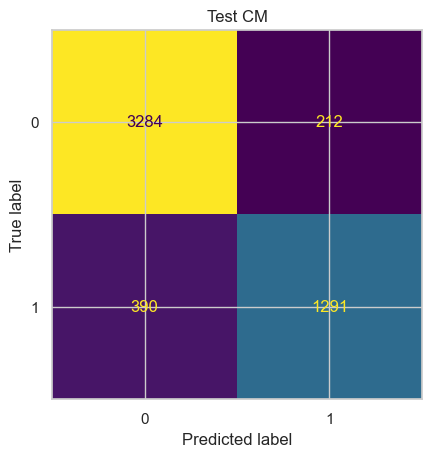

In [39]:
cm_knn = confusion_matrix(y_test, y_pred_test_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp.plot(colorbar=False)
disp.ax_.set_title('Test CM')
plt.show()

In [40]:
print(' Validation Report \n')
print(classification_report(y_val, y_pred_val_knn, target_names=['positive','negative']))

 Validation Report 

              precision    recall  f1-score   support

    positive       0.88      0.92      0.90       875
    negative       0.83      0.75      0.79       420

    accuracy                           0.87      1295
   macro avg       0.86      0.84      0.84      1295
weighted avg       0.87      0.87      0.87      1295



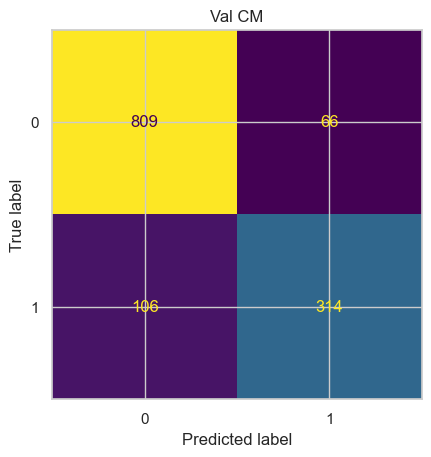

In [41]:
cm_knn = confusion_matrix(y_val, y_pred_val_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp.plot(colorbar=False)
disp.ax_.set_title('Val CM')
plt.show()

In [42]:
with open("../models/knn_model.pkl", "wb") as f:
    pickle.dump(knn, f)
print("KNN Model saved")

KNN Model saved


# Logistic Regresion
La Regresión Logística es un modelo estadístico utilizado principalmente para problemas de clasificación binaria. A diferencia de la regresión lineal, que se usa para predecir valores continuos, la regresión logística se emplea para predecir la probabilidad de pertenencia de una observación a una de dos posibles categorías.

La Regresión Logística es ampliamente utilizada en diversas áreas para resolver problemas de clasificación, tales como:
*   Diagnóstico Médico: Clasificación de pacientes en base a la presencia o ausencia de una enfermedad
*   Marketing: Predicción de si un cliente comprará o no un producto.
*   Finanzas: Evaluación del riesgo crediticio y predicción de la probabilidad de incumplimiento de pago.
* Seguridad Informática: Detección de correos electrónicos de spam o no spam.
* La Regresión Logística es una herramienta poderosa debido a su simplicidad, interpretabilidad y capacidad para manejar problemas de clasificación binaria eficientemente.

In [43]:
lr_params = {'C': [1e-4, 1e-2, 1e-1,1,10, 100, 1000] ,
                  'tol': [ 1e-4, 1e-3,100,1000 ],
                  'solver': ['newton-cg', 'lbfgs', 'liblinear'],
                  'max_iter': [20000, 5000],
                  'penalty': ['l1', 'none']
                  
                   

                   }

lr_grid = GridSearchCV(LogisticRegression(random_state = 24) , lr_params, scoring = 'accuracy',n_jobs=-1, refit = True, verbose = 3)


In [44]:
lr_grid.fit(X_train, y_train)

Fitting 5 folds for each of 336 candidates, totalling 1680 fits


GridSearchCV(estimator=LogisticRegression(random_state=24), n_jobs=-1,
             param_grid={'C': [0.0001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [20000, 5000], 'penalty': ['l1', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear'],
                         'tol': [0.0001, 0.001, 100, 1000]},
             scoring='accuracy', verbose=3)

In [45]:
# print best parameter after tuning
print(lr_grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(lr_grid.best_estimator_)

{'C': 100, 'max_iter': 20000, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}
LogisticRegression(C=100, max_iter=20000, penalty='l1', random_state=24,
                   solver='liblinear')


In [46]:
y_train_pred_lr = lr_grid.predict(X_train)
y_val_pred_lr = lr_grid.predict(X_val)
y_test_pred_lr = lr_grid.predict(X_test)

In [47]:
print(' Train Report \n')
print(classification_report(y_train, y_train_pred_lr, target_names=['positive','negative']))

 Train Report 

              precision    recall  f1-score   support

    positive       0.78      0.88      0.83      4371
    negative       0.66      0.47      0.55      2101

    accuracy                           0.75      6472
   macro avg       0.72      0.68      0.69      6472
weighted avg       0.74      0.75      0.74      6472



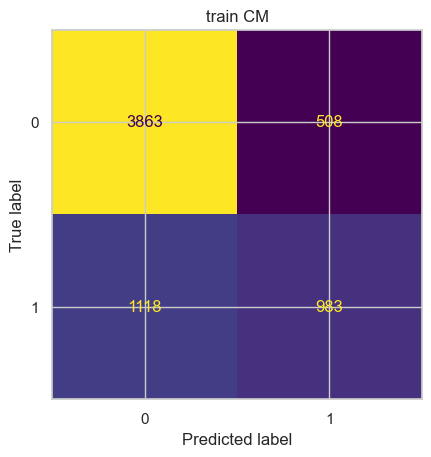

In [53]:
cm_lr = confusion_matrix(y_train, y_train_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp.plot(colorbar=False)
disp.ax_.set_title('train CM')
plt.show()

In [49]:
print('Test Report \n')
print(classification_report(y_test, y_test_pred_lr, target_names=['positive','negative']))

Test Report 

              precision    recall  f1-score   support

    positive       0.78      0.88      0.83      3496
    negative       0.66      0.47      0.55      1681

    accuracy                           0.75      5177
   macro avg       0.72      0.68      0.69      5177
weighted avg       0.74      0.75      0.74      5177



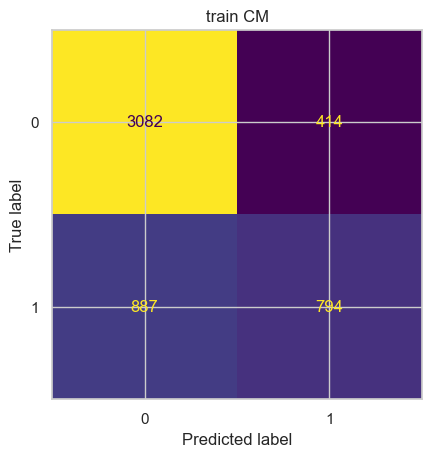

In [54]:
cm_lr = confusion_matrix(y_test, y_test_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp.plot(colorbar=False)
disp.ax_.set_title('train CM')
plt.show()

In [51]:
print(' Val Report \n')
print(classification_report(y_val, y_val_pred_lr, target_names=['positive','negative']))

 Val Report 

              precision    recall  f1-score   support

    positive       0.77      0.89      0.83       875
    negative       0.67      0.45      0.54       420

    accuracy                           0.75      1295
   macro avg       0.72      0.67      0.68      1295
weighted avg       0.74      0.75      0.73      1295



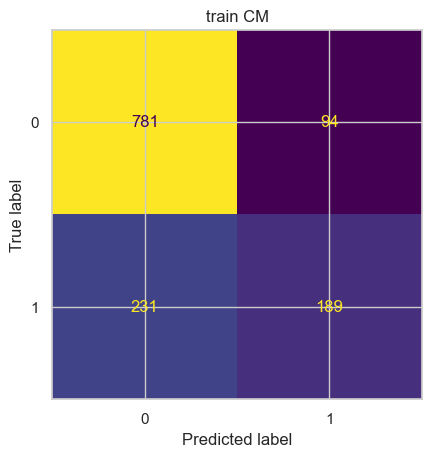

In [55]:
cm_lr = confusion_matrix(y_val, y_val_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp.plot(colorbar=False)
disp.ax_.set_title('train CM')
plt.show()

In [56]:
with open("../models/lr_model.pkl", "wb") as f:
    pickle.dump(lr_grid.best_estimator_, f)
print("Logistic Regression Model saved")

Logistic Regression Model saved


# Conclusiones
Se analizaron tres modelos SVC, kNN y Regresión logística, obteniendo los siguientes resultados:

| Informe              | Clase     | Precisión | Recall | F1-Score | Soporte |
|----------------------|-----------|-----------|--------|----------|---------|
| **SVC**   | Positive  | 0.91      | 0.96   | 0.94     | 875     |
|                      | Negative  | 0.92      | 0.81   | 0.86     | 420     |
| **General**          |           | **0.91**  | **0.89**| **0.90** | **1295**|
| **kNN**| Positive  | 0.88      | 0.92   | 0.90     | 875     |
|                      | Negative  | 0.82      | 0.75   | 0.78     | 420     |
| **General**          |           | **0.86**  | **0.83**| **0.84** | **1295**|
| **Regresión logística**| Positive  | 0.74      | 0.88   | 0.81     | 875     |
|                      | Negative  | 0.59      | 0.35   | 0.44     | 420     |
| **General**          |           | **0.71**  | **0.62**| **0.62** | **1295**|

Como podemos observar el mejor desempeño fue dado por el modelo de SVC, en todas las métricas, con mayores valores de precisión, recall y f1-score para las clases positivas y negativas. La exactitud general es también la más alta (0.91). Esto sugiere que el modelo ha aprendido a generalizar bien sin sobreajustarse a los datos de entrenamiento.

El modelo de kNN tiene un buen rendimiento, pero es ligeramente inferior al SVC. La precisión, el recall y el f1-score son más bajos en comparación, y la exactitud general es de 0.86. Esto indica que el modelo es bueno pero inferior al modelo SVC .

El modelo de Regresión logística muestra un rendimiento significativamente inferior a los anteriores, especialmente en la clase "negative", con baja precisión (0.59), recall (0.35) y f1-score (0.44). La exactitud general es también la más baja (0.71). Esto sugiere que el modelo tiene dificultades para generalizar y probablemente está sobreajustado a los datos de entrenamiento.

Para los modelos kNN y regresión logística pueden identificar mejor los péptidos con efecto anticancerígeno en comparación con los que no lo tienen, es decir presentan mas proporción de falsos negativos que de falsos positivos. Teniendo la regresión logística un desempeño considerablemente menor.

El modelo que se tomará de base es el SVC, que logra discernir mejor entre los péptidos con efecto anticancerígeno (positivo) de los que no lo tienen (negativo). 


# Referencias

1. Support Vector classifier. (n.d.). https://apmonitor.com/pds/index.php/Main/SupportVectorClassifier

2. k-Nearest Neighbors classifier. (n.d.). https://apmonitor.com/pds/index.php/Main/KNearestNeighbors